In [1]:
print( "Jai Jagannath")

Jai Jagannath


In [2]:
import pandas as pd

df = pd.read_csv("data.csv", encoding= "unicode_escape")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
# convert date column to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate'])
# keep only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int , errors='ignore')
df_rec = df[df['rank']==1]

In [15]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Date,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0


In [16]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

C:\Users\Aditya Ayush Mishra\AppData\Local\Temp\ipykernel_12468\3505644634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [21]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01 08:26:00,1.0,0


In [23]:
freq = df_rec.groupby('CustomerID')['Date'].count()

df_freq = pd.DataFrame(freq).reset_index()

df_freq.columns = ['CustomerID', 'frequency']

df_freq.head()

,CustomerID,frequency
0,12346.0,1
1,12347.0,31
2,12348.0,17
3,12349.0,73
4,12350.0,17


In [27]:
rec_freq = df_freq.merge(df_rec, on = 'CustomerID')

rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,date,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,2011-01-18 10:01:00,1.0,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6


In [28]:
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']

m = rec_freq.groupby('CustomerID')['total'].sum()

m = pd.DataFrame(m).reset_index()

m.columns = ['CustomerID' , 'monetary_value']

m.head()

,CustomerID,monetary_value
0,12346.0,189248.25
1,12347.0,1246.73
2,12348.0,4311.90
3,12349.0,1618.81
4,12350.0,553.25


In [29]:
rfm = m.merge(rec_freq, on ='CustomerID')

rfm.head()

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,date,Date,rank,recency,total
0,12346.0,189248.25,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,2011-01-18 10:01:00,1.0,48,189248.25
1,12347.0,1246.73,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6,40.68
2,12347.0,1246.73,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6,11.00
3,12347.0,1246.73,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6,40.68
4,12347.0,1246.73,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,2010-12-07 14:57:00,1.0,6,122.04


In [31]:
finaldf = rfm[['CustomerID' , 'recency' , 'frequency' , 'monetary_value']]

finaldf.head()

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,1,189248.25
1,12347.0,6,31,1246.73
2,12347.0,6,31,1246.73
3,12347.0,6,31,1246.73
4,12347.0,6,31,1246.73


recency: 


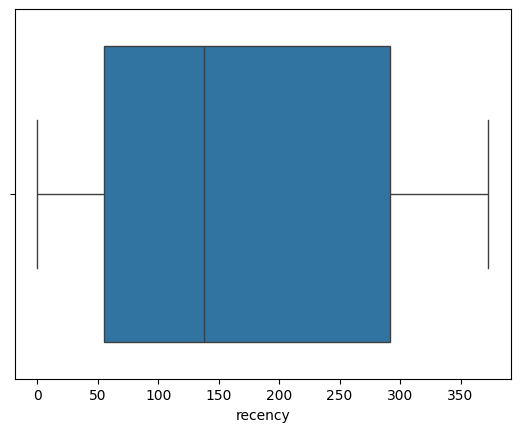

frequency: 


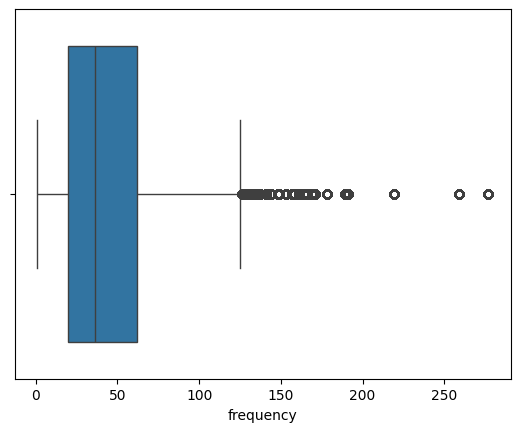

monetary_value: 


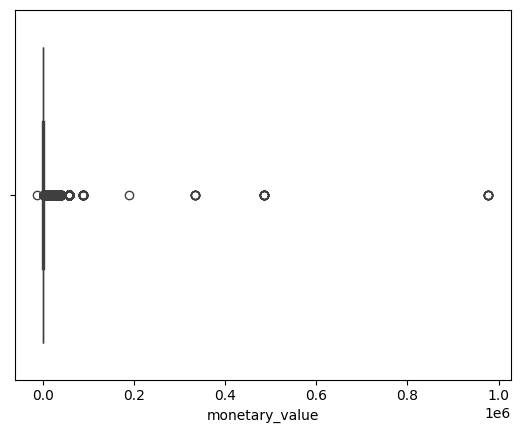

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

list1 = ['recency' , 'frequency' , 'monetary_value']

for i in list1:
    print(str(i)+ ': ')
    ax= sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [35]:
from scipy import stats
import numpy as np

new_df = finaldf[['recency' , 'frequency', 'monetary_value']]

z_scores = stats.zscore(new_df)

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3 ).all(axis = 1)

new_df = new_df[filtered_entries]

In [41]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.9 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.9 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.9 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.9 MB 8.1 MB/s eta 0:00:02
   --------------- ------------------------ 4.1/10.9 MB 15.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.9 MB 15.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.9 MB 13.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.9 MB 17.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.2/10.9 MB 19.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/10.9 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------  10.9/10.9 MB 28.4 MB/s eta 0:00:

In [44]:
from sklearn.preprocessing import StandardScaler

new_df = new_df.drop_duplicates()

col_names = ['recency' , 'frequency' , 'monetary_value']
features = new_df[col_names]

scaler = StandardScaler().fit(features.values)
features= scaler.transform(features.values)

scaled_features = pd.DataFrame(features , columns= col_names)

In [46]:
scaled_features.head()

,recency,frequency,monetary_value
0,-1.196723,0.379971,0.185080
1,-1.120665,-0.259085,1.965919
2,1.752654,2.297138,0.401256
3,-0.715020,-0.259085,-0.217826
4,-0.596706,-0.350378,0.011294


Text(0, 0.5, 'Intertia')

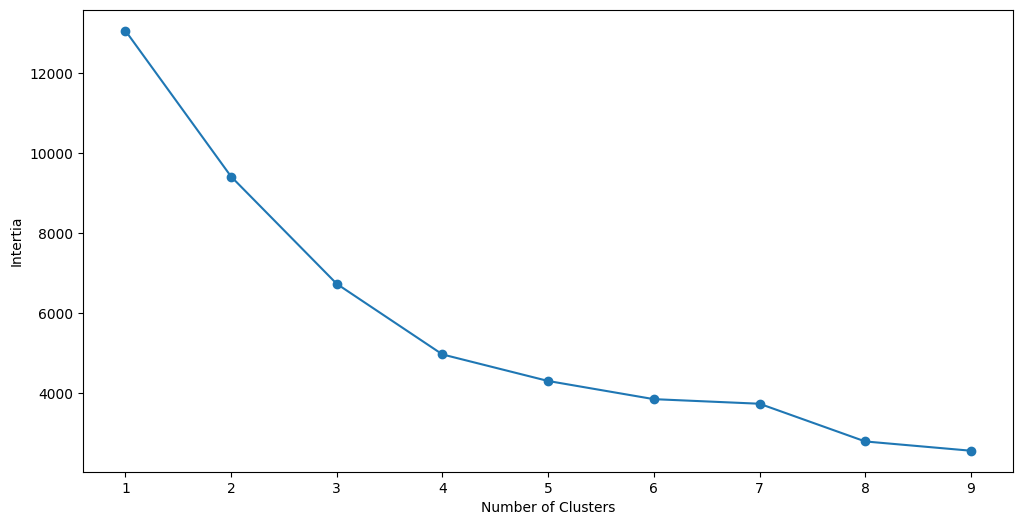

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters= cluster , init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster' : range (1,10), 'SSE' : SSE })

plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'] , marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')

In [67]:
kmeans = KMeans(n_clusters= 4 , init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [68]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.43616008758844627


In [70]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)

frame['cluster'] = pred



,recency,frequency,monetary_value,cluster
1,6,31,1246.73,0
32,15,17,4311.90,0
49,355,73,1618.81,1
122,63,17,553.25,0
139,77,15,947.61,0


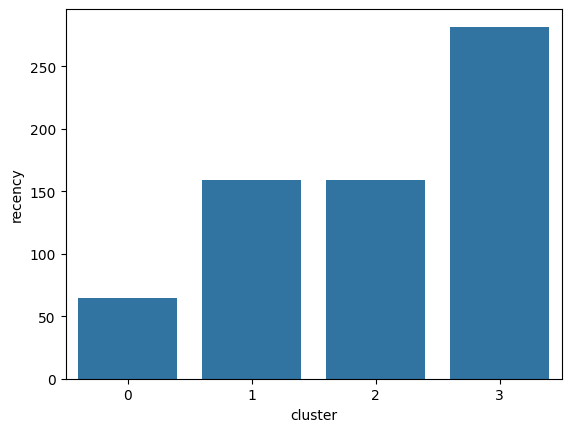

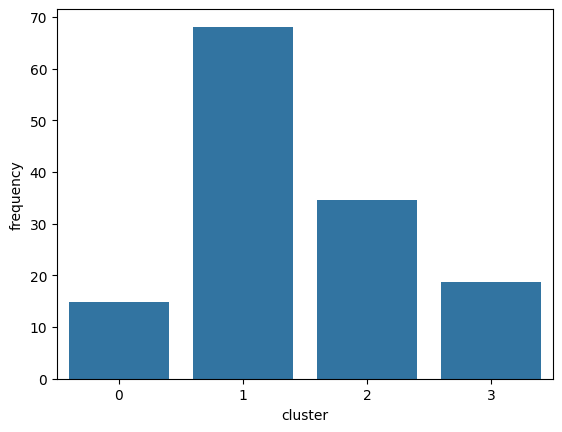

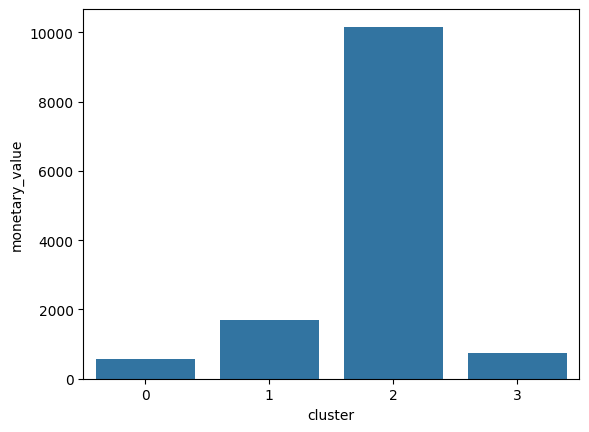

In [73]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()

for i in list1:
    sns.barplot(x='cluster', y=str(i) , data = avg_df)
    plt.show()
